In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score 
from rich import print #rich print allows for colored and styled output 
import numpy as np


In [2]:
# Load data
data = pd.read_csv("C:/Users/HP/OneDrive/Documents/Desktop/SummerTrainnigProject/Train.csv")
test_data = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\Desktop\\SummerTrainnigProject\\Test.csv")

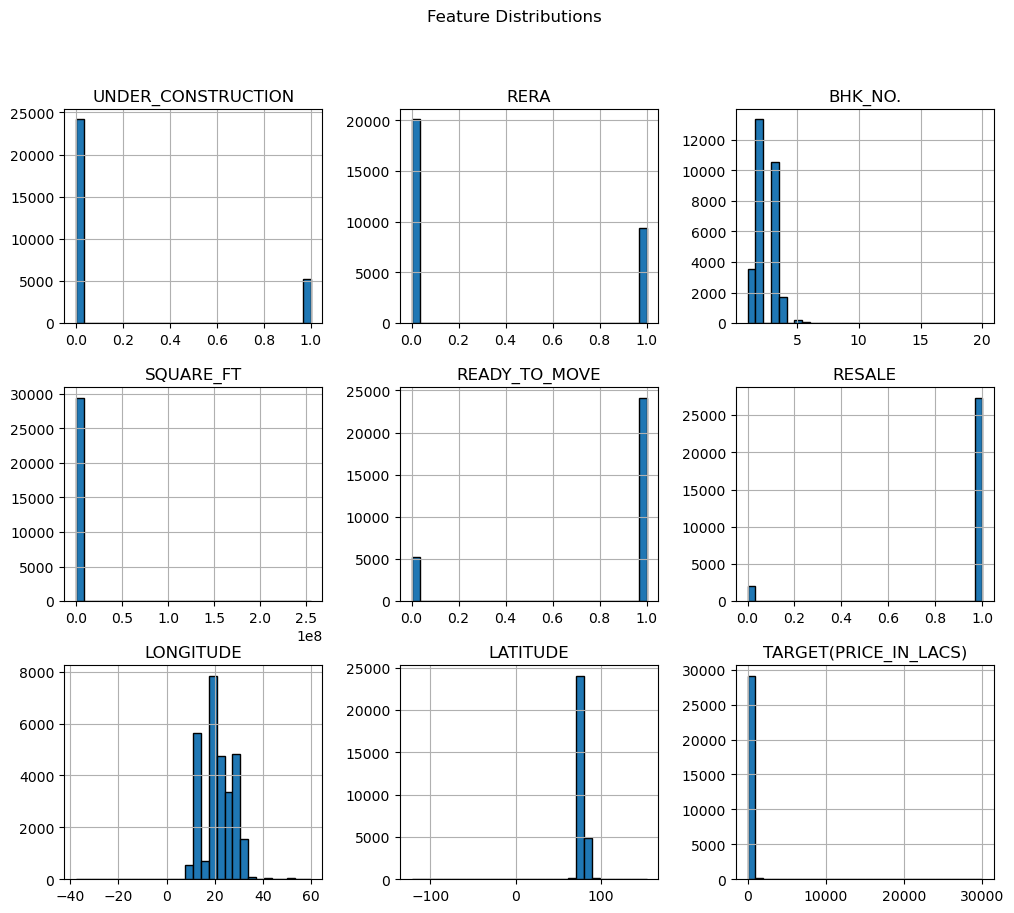

In [3]:
# Visualize dataset
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [4]:
# Define independent and dependent variables
x = data.drop("TARGET(PRICE_IN_LACS)", axis=1)
y = data["TARGET(PRICE_IN_LACS)"]


In [5]:
# Preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [6]:
# Identify numeric and categorical columns
numeric_columns = x.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = x.select_dtypes(include=['object']).columns

In [7]:
# Bundle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [8]:
# Apply transformation
x_preprocessed = preprocessor.fit_transform(x)
test_preprocessed = preprocessor.transform(test_data)

In [9]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=16)

In [10]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=56),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=56),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=56),
    "Ridge Regression": Ridge(random_state=56)
}


In [11]:
# Try XGBoost if available
try:
    from xgboost import XGBRegressor
    models["XGBoost"] = XGBRegressor(n_estimators=100, random_state=56)
except ImportError:
    print("XGBoost not installed. Skipping XGBoost model.")


XGBoost not installed. Skipping XGBoost model.

In [12]:
# Train and evaluate models
results = {}
best_model = None
best_r2 = float('-inf')


In [16]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2,
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "Explained Variance": explained_variance_score(y_test, y_pred)
    }
    
    # Track best model
    if r2 > best_r2:
        best_r2 = r2
        best_model = model

In [17]:
# Display results
for model, metrics in results.items():
    print(f"[bold green]{model}[/bold green]:")  # Make the model name bold and green
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()  # New line between models

Linear Regression:

MAE: 153.84404649485157

MSE: 433899.21577377646

RMSE: 658.7102669412224

R2 Score: 0.1948550890681897

MAPE: 1.754538069432831

Explained Variance: 0.19502213564348314

Lasso Regression:

MAE: 146.9815533209603

MSE: 430591.0211769987

RMSE: 656.1943471083842

R2 Score: 0.2009937865977941

MAPE: 1.674053588376749

Explained Variance: 0.20119863146187567

ElasticNet Regression:

MAE: 137.03974138899426

MSE: 456785.3218960107

RMSE: 675.8589511843509

R2 Score: 0.15238755005108906

MAPE: 1.5206805394541536

Explained Variance: 0.15265683138699848

Decision Tree:

MAE: 35.6233123257945

MSE: 121497.40399082337

RMSE: 348.56477732384747

R2 Score: 0.7745489898150911

MAPE: 0.2771068766886386

Explained Variance: 0.7746928550654211

Random Forest:

MAE: 31.475913800561738

MSE: 116498.09697038813

RMSE: 341.3181755640741

R2 Score: 0.7838257215061383

MAPE: 0.23636751313293877

Explained Variance: 0.7839456053067174

Gradient Boosting:

MAE: 47.71143931333599

MSE: 110444.39822932267

RMSE: 332.3317592847886

R2 Score: 0.7950589861825704

MAPE: 0.5464830773326569

Explained Variance: 0.7950807880678712

Ridge Regression:

MAE: 150.32455942498763

MSE: 425485.8633962258

RMSE: 652.292774294048

R2 Score: 0.21046693533202987

MAPE: 1.6971546909110256

Explained Variance: 0.21064798555532227

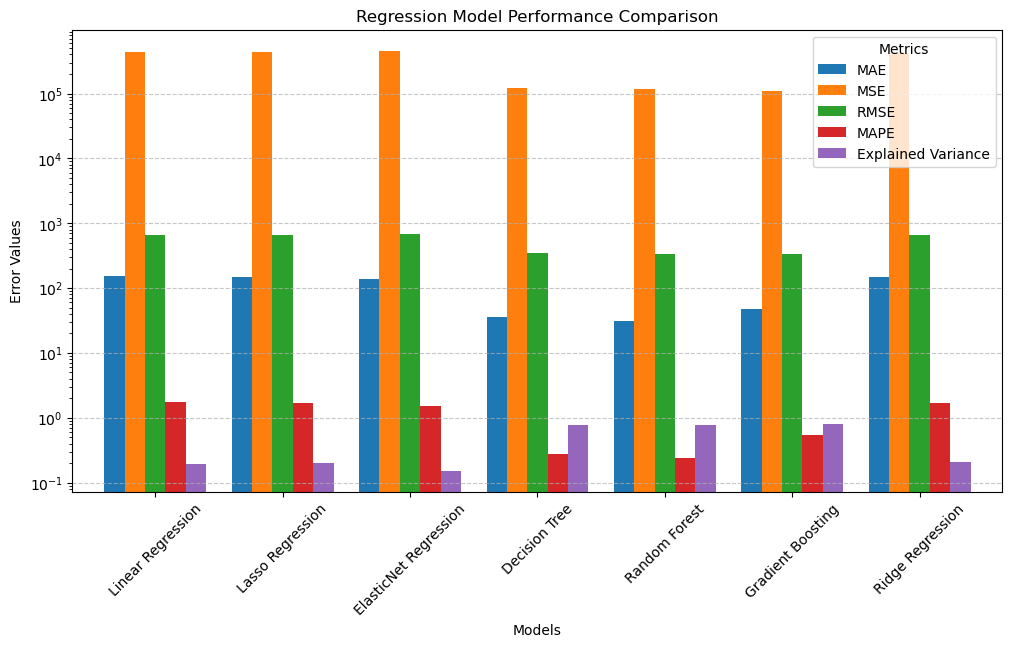

In [18]:
# Visualization of Model Performance
metrics_df = pd.DataFrame(results).T
ax = metrics_df[['MAE', 'MSE', 'RMSE', 'MAPE', 'Explained Variance']].plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Regression Model Performance Comparison")
plt.ylabel("Error Values")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.yscale("log")  # Use logarithmic scale to prevent dominance of high MSE values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


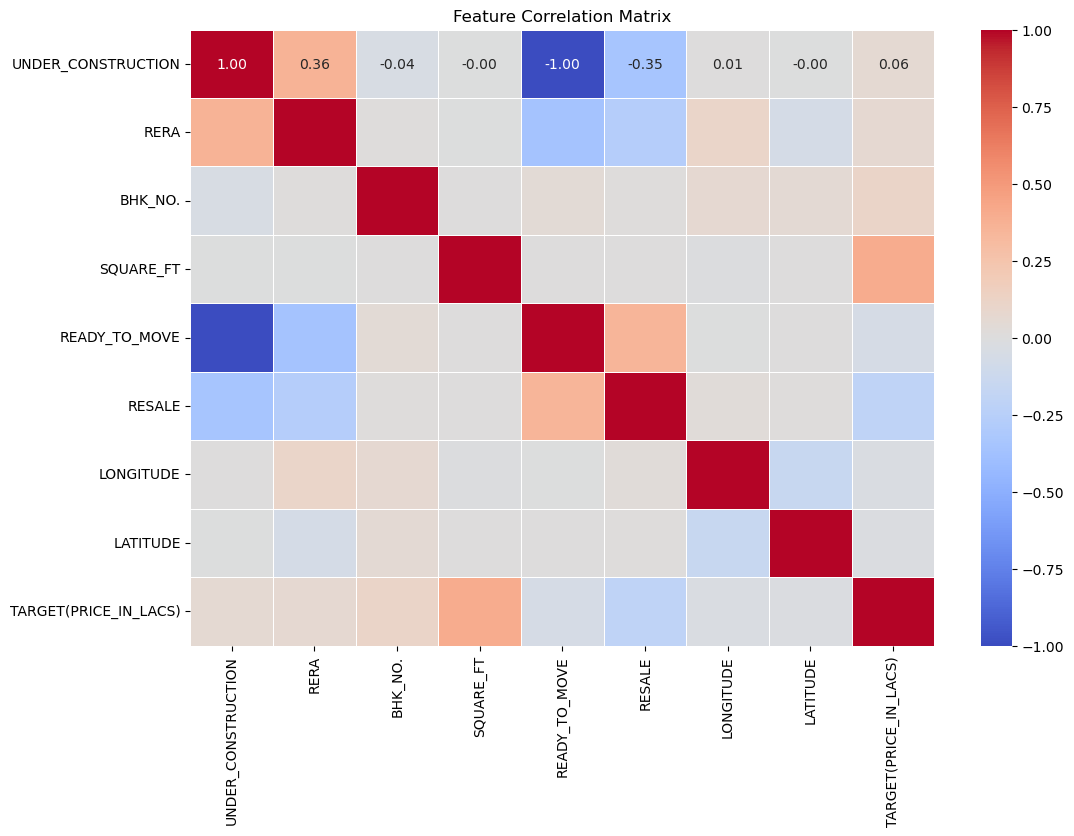

In [19]:
# Correlation Matrix Visualization
data_numeric = data.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

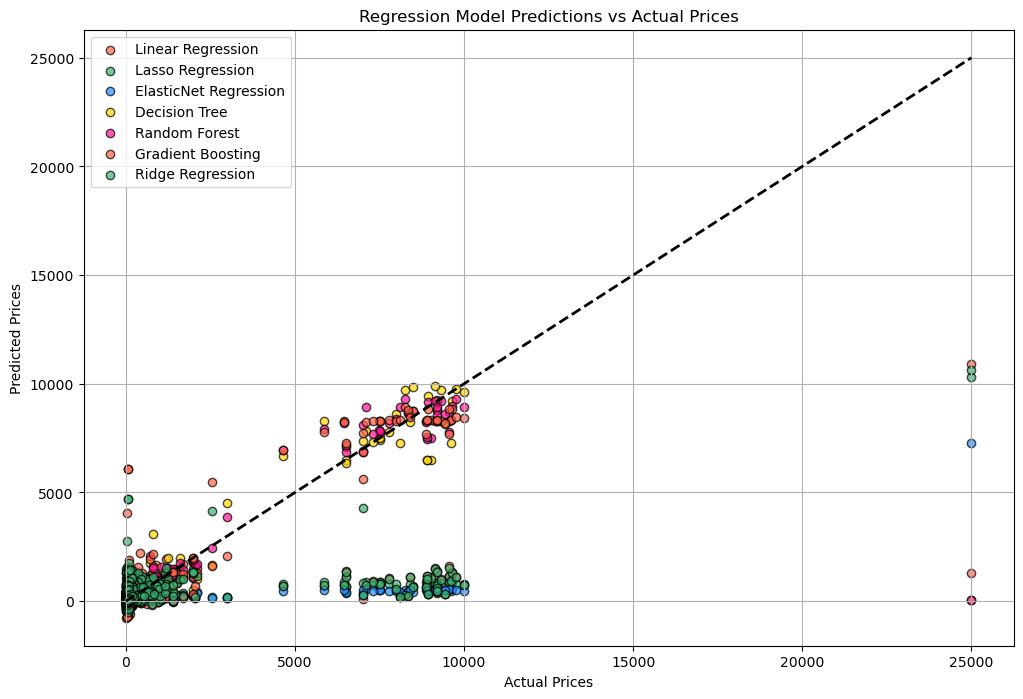

In [20]:
# Visualization for each regression model
plt.figure(figsize=(12, 8))

# Define a list of bright colors for the models
colors = ['#FF6347', '#3CB371', '#1E90FF', '#FFD700', '#FF1493']

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(x_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.7, color=colors[idx % len(colors)], edgecolors='black')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Model Predictions vs Actual Prices")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Predict house prices on test dataset using best model
test_predictions = best_model.predict(test_preprocessed)

In [20]:
# Save predictions
submission = pd.DataFrame({"Predicted Price": test_predictions})
submission.to_csv("C:\\Users\\HP\\OneDrive\\Documents\\Desktop\\SummerTrainnigProject\\sample_submission.csv", index=False)
print("Predictions saved to Sample_submission.csv")

Predictions saved to Sample_submission.csv

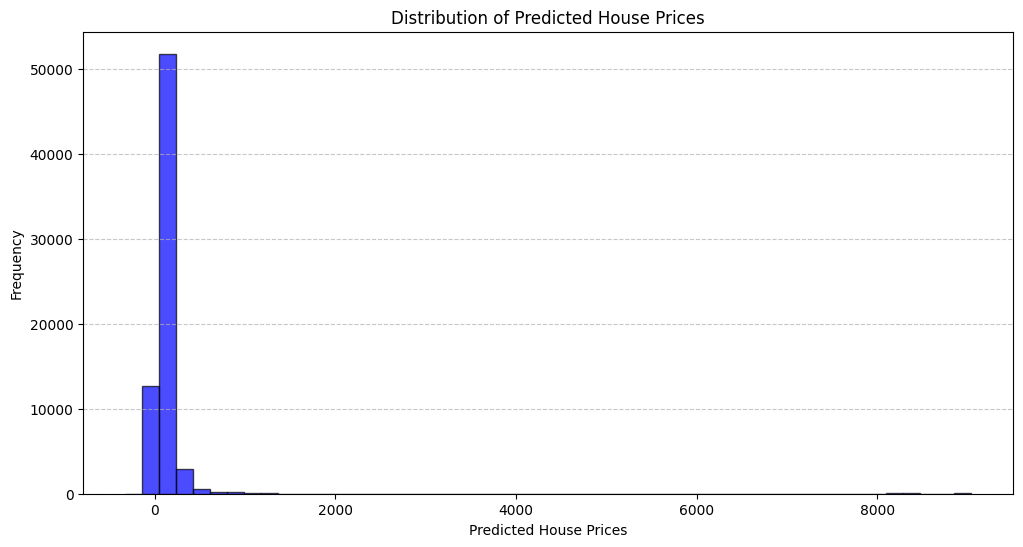

In [26]:
# Visualizing the test predictions
plt.figure(figsize=(12, 6))
plt.hist(test_predictions, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Predicted House Prices")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted House Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()